In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv('data/titanic.csv', sep= ',')

### Exploracion de datos

In [5]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [6]:
# Eliminar las columnas que no son necesarias
titanic = titanic.drop(columns=['Fare', 'Name'])

In [8]:
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [9]:
# Analizar el shape del dataset
titanic.shape

(887, 6)

In [10]:
#Visualizar los tipode de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [11]:
titanic = pd.get_dummies(titanic, columns = ["Sex"], drop_first=True)
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
5,0,3,27.0,0,0,True
6,0,1,54.0,0,0,True
7,0,3,2.0,3,1,True
8,1,3,27.0,0,2,False
9,1,2,14.0,1,0,False


In [12]:
# Remplazar el DataFrame
titanic.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [13]:
# Ordenar las columnas por nombre
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0
5,0,3,True,27.0,0,0
6,0,1,True,54.0,0,0
7,0,3,True,2.0,3,1
8,1,3,False,27.0,0,2
9,1,2,False,14.0,1,0


### Entrenamiento de arbol de decision con scikit-learn

In [14]:
## Separamos en X e Y
X = titanic.drop(columns=['Survived'])
Y = titanic.Survived

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=00000)

In [16]:
# Arbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [17]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluacion del modelo

In [18]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [20]:
# Calculo de las metricas
from sklearn.metrics import accuracy_score

# Calculo en accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8048387096774193
Test Accuracy: 0.7640449438202247


C:\Users\david\AppData\Local\Temp\ipykernel_9088\1888186879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


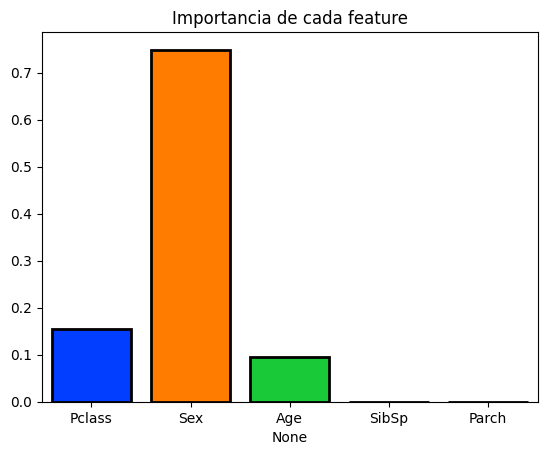

In [22]:
# Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada feature')
plt.show()